In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nb
import pickle
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## Connectivity gradients

In [3]:
df = pd.read_csv('/home/julia/data/gradients/results/regions/finest_regions.csv')
df = df.drop(columns=['Unnamed: 0', 'comment'])
df = df.dropna()
df = df.reindex()

In [4]:
df.loc[df['acronym']=='MOp', 'cluster'] = 'motor'
df.loc[df['acronym']=='MOs', 'cluster'] = 'motor'
df.loc[df['acronym']=='SSp-n', 'cluster'] = 'nose'
df.loc[df['acronym']=='SSp-bfd', 'cluster'] = 'nose'
df.loc[df['cluster']=='somatomotor', 'cluster'] = 'somatosensory'

In [5]:
with open('/home/julia/data/gradients/results/regions/gradient2_by_cluster.pkl', 'rb') as f:
    g2 = pickle.load(f)
with open('/home/julia/data/gradients/results/regions/gradient4_by_cluster.pkl', 'rb') as f:
    g4 = pickle.load(f)
with open('/home/julia/data/gradients/results/regions/gradient1_by_cluster.pkl', 'rb') as f:
    g1 = pickle.load(f)
with open('/home/julia/data/gradients/results/regions/gradient3_by_cluster.pkl', 'rb') as f:
    g3 = pickle.load(f)
with open('/home/julia/data/gradients/results/regions/gradient0_by_cluster.pkl', 'rb') as f:
    g0 = pickle.load(f)
with open('/home/julia/data/gradients/results/regions/gradient5_by_cluster.pkl', 'rb') as f:
    g5 = pickle.load(f)

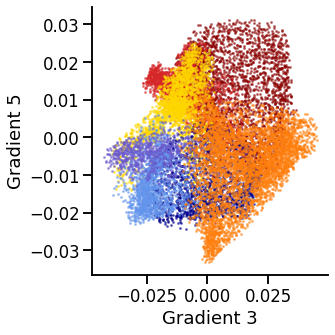

In [6]:
clusters = ['motor', 'prefrontal','lateral', 'medial', 'visual', 'auditory', 'somatosensory','nose']
colors = ['darkred', 'tab:red', 'gold', 'darkblue','cornflowerblue','slateblue', 'tab:orange','tab:orange']
sns.set_context('talk')
fig = plt.figure(figsize=(5,5))

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        plt.scatter(g2[r], g4[r], color=colors[c], label=clusters[c], alpha=0.5, s=2)
plt.xlabel('Gradient 3')
plt.ylabel('Gradient 5')
plt.tight_layout()
sns.despine()
fig.savefig("/home/julia/data/gradients/pics/scatter_g3_5.png")

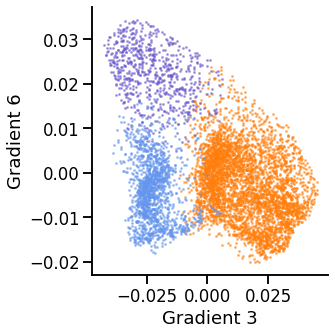

In [7]:
clusters = ['somatosensory', 'nose','auditory', 'visual']
colors = ['tab:orange','tab:orange','slateblue', 'cornflowerblue']
sns.set_context('talk')
fig = plt.figure(figsize=(5,5))

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        plt.scatter(g2[r], g5[r], color=colors[c], label=clusters[c], alpha=0.5, s=2)
plt.xlabel('Gradient 3')
plt.ylabel('Gradient 6')
plt.tight_layout()
sns.despine()
fig.savefig("/home/julia/data/gradients/pics/scatter_g3_6.png")

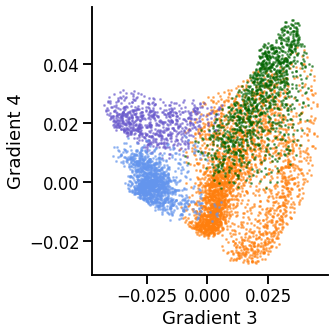

In [9]:
clusters = ['somatosensory', 'auditory', 'visual', 'nose']
colors = ['tab:orange','slateblue', 'cornflowerblue', 'darkgreen']
sns.set_context('talk')
fig = plt.figure(figsize=(5,5))

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        plt.scatter(g2[r], g3[r], color=colors[c], label=clusters[c], alpha=0.5, s=2)
plt.xlabel('Gradient 3')
plt.ylabel('Gradient 4')
plt.tight_layout()
sns.despine()
fig.savefig("/home/julia/data/gradients/pics/scatter_g3_4.png")

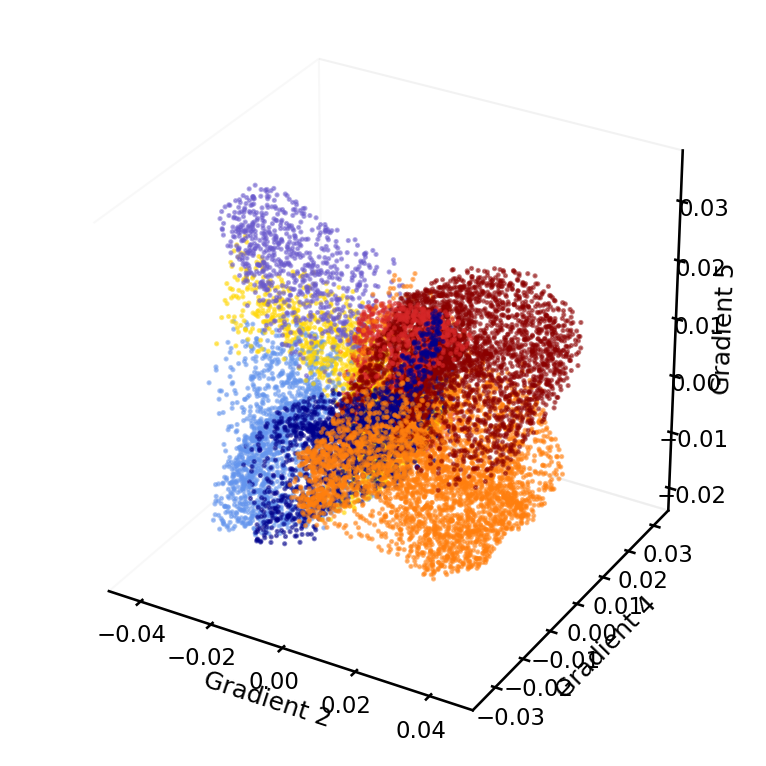

In [10]:
clusters = ['motor', 'somatosensory', 'nose','prefrontal','lateral', 'medial', 'visual', 'auditory']
colors = ['darkred', 'tab:orange', 'tab:orange','tab:red', 'gold', 'darkblue','cornflowerblue','slateblue']
fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, projection='3d')

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        ax.scatter(xs=g2[r], ys=g4[r], zs=g5[r], color=colors[c], label=clusters[c], alpha=0.5, s=5)
#ax.set_xlim(-0.025, 0.045)
#ax.set_ylim(-0.025, 0.045)
#ax.set_zlim(-0.035, 0.035)

ax.grid(False) 
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False

ax.set_xlabel('Gradient 2')
ax.set_ylabel('Gradient 4')
ax.set_zlabel('Gradient 5')
plt.tight_layout()

### Gene components

In [11]:
with open('/home/julia/data/gradients/results/genes/pca2_by_cluster.pkl', 'rb') as f:
    p2 = pickle.load(f)
with open('/home/julia/data/gradients/results/genes/pca4_by_cluster.pkl', 'rb') as f:
    p4 = pickle.load(f)
with open('/home/julia/data/gradients/results/genes/pca1_by_cluster.pkl', 'rb') as f:
    p1 = pickle.load(f)
with open('/home/julia/data/gradients/results/genes/pca3_by_cluster.pkl', 'rb') as f:
    p3 = pickle.load(f)
with open('/home/julia/data/gradients/results/genes/pca0_by_cluster.pkl', 'rb') as f:
    p0 = pickle.load(f)
with open('/home/julia/data/gradients/results/genes/pca5_by_cluster.pkl', 'rb') as f:
    p5 = pickle.load(f)

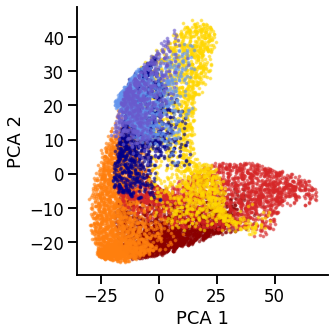

In [12]:
clusters = ['motor', 'somatosensory','prefrontal','lateral', 'medial', 'visual', 'auditory']
colors = ['darkred', 'tab:orange', 'tab:red', 'gold', 'darkblue','cornflowerblue','slateblue']
fig = plt.figure(figsize=(5,5))

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        plt.scatter(p1[r], p2[r], color=colors[c], label=clusters[c], alpha=0.5, s=5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
sns.despine()

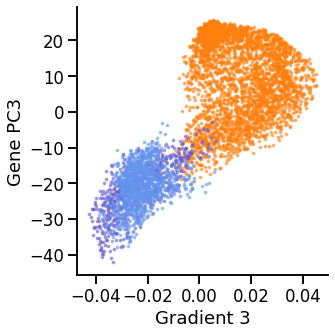

In [13]:
clusters = ['somatosensory', 'nose','auditory', 'visual',]
colors = ['tab:orange','tab:orange','slateblue', 'cornflowerblue',]
fig = plt.figure(figsize=(5,5))

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        plt.scatter(g2[r], -p2[r], color=colors[c], label=clusters[c], alpha=0.5, s=5)
plt.xlabel('Gradient 3')
plt.ylabel('Gene PC3')
plt.tight_layout()
sns.despine()
fig.savefig("/home/julia/data/gradients/pics/scatter_gene3_g6.png")

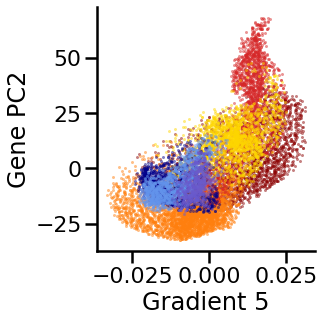

In [14]:
sns.set_context('poster')
clusters = ['motor', 'somatosensory','nose','prefrontal','lateral', 'medial', 'visual', 'auditory']
colors = ['darkred', 'tab:orange', 'tab:orange', 'tab:red', 'gold', 'darkblue','cornflowerblue','slateblue']
fig = plt.figure(figsize=(5,5))

for c in range(len(clusters)):
    regions = list(df.loc[df['cluster']==clusters[c], 'acronym'])
    for r in regions:
        plt.scatter(g4[r], p1[r], color=colors[c], label=clusters[c], alpha=0.5, s=1)
plt.xlabel('Gradient 5')
plt.ylabel('Gene PC2')
plt.tight_layout()
sns.despine()
fig.savefig("/home/julia/data/gradients/pics/scatterpc2_g5.png")